In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import lag_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("data/stocks/AMZN.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-03-13,89.970001,94.019997,88.120003,92.430000,92.430000,72397100
1,2023-03-14,93.830002,95.070000,92.709999,94.879997,94.879997,60912700
2,2023-03-15,93.220001,96.669998,93.070000,96.199997,96.199997,70731800
3,2023-03-16,95.750000,100.989998,95.610001,100.040001,100.040001,84446900
4,2023-03-17,99.790001,100.660004,97.459999,98.949997,98.949997,87300200


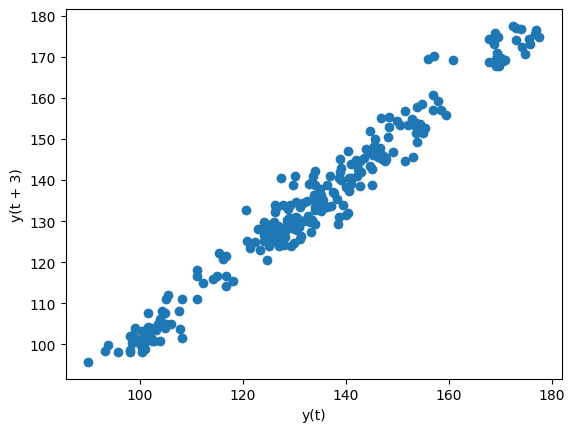

In [3]:
plt.figure()
lag_plot(df['Open'], lag=3)
plt.show()

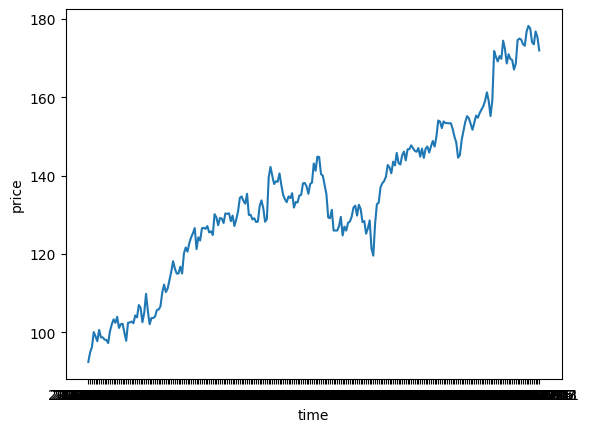

In [4]:
plt.plot(df["Date"], df["Close"])
plt.xticks(np.arange(0, len(df)), df['Date'][0:len(df)])
plt.xlabel("time")
plt.ylabel("price")
plt.show()

In [5]:
train_data, test_data = df[0:int(len(df)*0.7)], df[int(len(df)*0.7):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
history = [x for x in training_data]
model_predictions = []
N_test_observations = len(test_data)
for time_point in range(N_test_observations):
    model = ARIMA(history, order=(4,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    model_predictions.append(yhat)
    true_test_value = test_data[time_point]
    history.append(true_test_value)
MSE_error = mean_squared_error(test_data, model_predictions)
print('Testing Mean Squared Error is {}'.format(MSE_error))

Testing Mean Squared Error is 6.1923626273564505


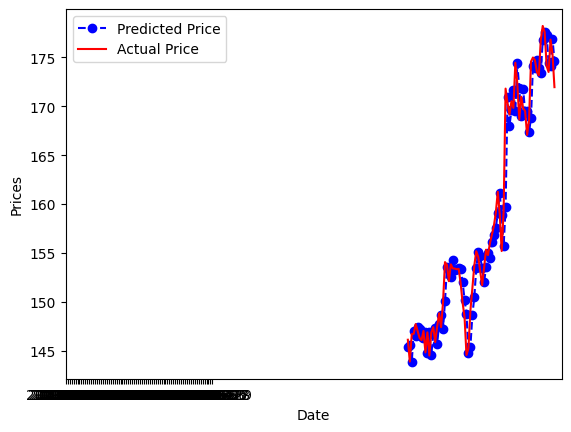

In [6]:
test_set_range = df[int(len(df)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', marker='o', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.xticks(np.arange(0,len(test_set_range)), df.Date[0:len(test_set_range)])
plt.legend()
plt.show()